In [1]:
import time

from diffbank.bank import Bank
import jax.numpy as jnp
from diffbank.waveforms.threePN_simple import amp, Psi
from diffbank.utils import get_M_eta_sampler, Sn_func
import matplotlib.pyplot as plt

In [2]:
fs = jnp.linspace(30.0, 512.0, 1000)
M_range = (4.0, 6.0)
eta_range = (0.13888, 0.25)
sampler = get_M_eta_sampler(M_range, eta_range)

bank = Bank.load_bank("../scripts/3PN.npz", amp, Psi, Sn_func, sampler)

Fraction of templates above 0.95: 0.594


Text(0, 0.5, 'PDF')

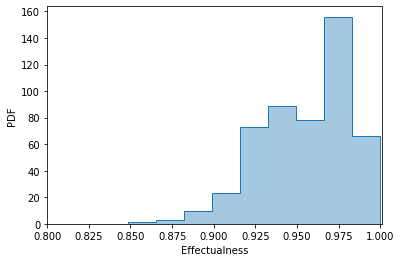

In [4]:
print("Fraction of templates above 0.95:", sum(bank.effectualnesses > 0.95)/bank.effectualnesses.size)
plt.hist(bank.effectualnesses[:], bins=15, histtype="step", color="C0")
plt.hist(bank.effectualnesses[:], bins=15, alpha=0.4, color="C0")
plt.xlim(0.8, 1.001)
plt.xlabel("Effectualness")
plt.ylabel("PDF")